In [1]:
#libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
#libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive=drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
work_data=data.copy()
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
work_data=work_data.drop(['society'],axis=1)



In [6]:
a=np.array([work_data['total_sqft']])
b=[]
c=a

for i in range(len(a[0])):
    try:
      if '-' in a[0][i] or float(a[0][i]):
         print(a[0][i])
    except:
      b.append(a[0][i])


Streaming output truncated to the last 5000 lines.
1074
1200
1170
596 - 861
1660
900
1850
510
1601
952
1166
2700
1900
1350
1520
2100
1175
1432
1005
1309
2251
1050
1100
2400
1565
940
1015
2400
1652
1100
2340
1084
1200
1400
2400
1020
1267
2439
1645
1100
1320
1000
5000
2500
2480
1086
416
1066
1730
1205
2500
960
1510
1600
2300
1000
1160
1553
3436
1134
600
2400
2400
1350
1032
1998
1225
1262
1842
1300
1070
950
1012
1000
1394
1450
527
1693
3122
1000
952
2050
1200
1410
1400
3056
1826
1689
1075
2500
960
808
907
1300
1804
1350
1836
826
1200
3000
2400
1460
1200
965
2000
1395
1660
935
1180
1090
1204
2072
1056
985
1315
734
2900
2317
600
2200
656
400
666
3293
1174
1153
1000
2400
957
910
1060
1000
1843
1150
1230
3197
1703
1125
1516
1130
3596
1512
1491
1250
1650
1140
1200
1881
1100
2666
1500
1217
1197
2400
1345
1200
3230
1260
2750
1200
1650
600
1025
1925 - 2680
973
4110
2533
1007
615 - 985
1830
1077
672
1280
865
1000
1285
662
2297
3750
1850
1754
1200
2200
1567
1695
360
1150
1690
2350
1057
1320
2119
11

In [7]:
b=np.array(b)
print(len(b))


46


In [8]:
df=work_data['total_sqft']
for i in range(len(df)):
   if '-' in f'{df[i]}':
    df[i]=df[i].split('-')
    df[i]=(float(df[i][0])+float(df[i][1]))/2
   elif df[i] in b:
    df[i]=np.nan
   else:
    df[i]=float(df[i])
df.head()

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0


In [9]:
work_data['total_sqft']=df
work_data['total_sqft']=work_data['total_sqft'].astype(float)
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13274 non-null  float64
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(4), object(4)
memory usage: 832.6+ KB


<Axes: >

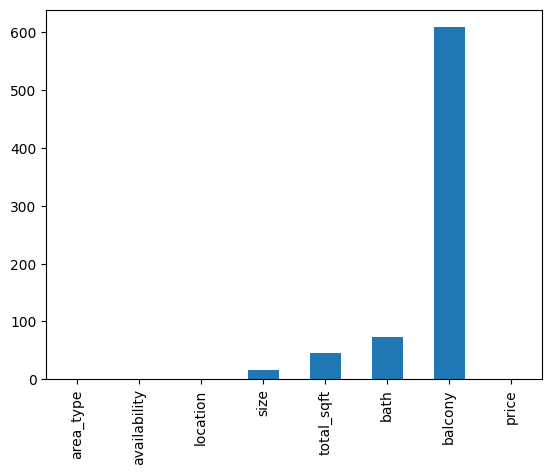

In [10]:
work_data.isnull().sum().plot(kind='bar')

<Axes: >

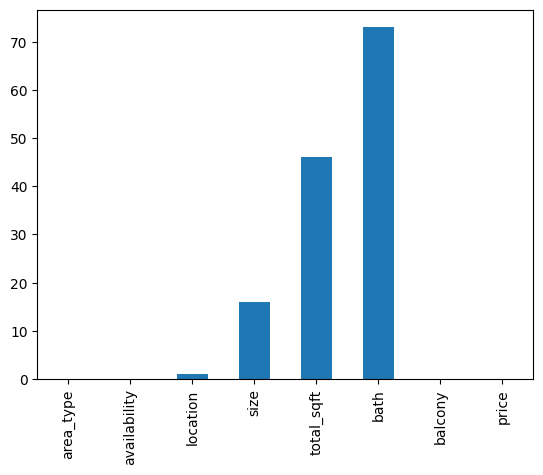

In [11]:
imputer=SimpleImputer(strategy='most_frequent')
work_data['balcony']=imputer.fit_transform(work_data[['balcony']])
work_data.isnull().sum().plot(kind='bar')



In [12]:
work_data.dropna(inplace=True)
work_data.drop_duplicates(inplace=True)
work_data.describe()

,total_sqft,bath,balcony,price
count,12631.000000,12631.000000,12631.000000,12631.000000
mean,1566.214544,2.708970,1.601219,114.208784
std,1260.648563,1.356845,0.809795,151.915386
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1280.000000,2.000000,2.000000,73.000000
75%,1688.060000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


In [13]:
work_data.head()
work_data['price_per_sqft'] = work_data['price'] / work_data['total_sqft']

<Axes: xlabel='size'>

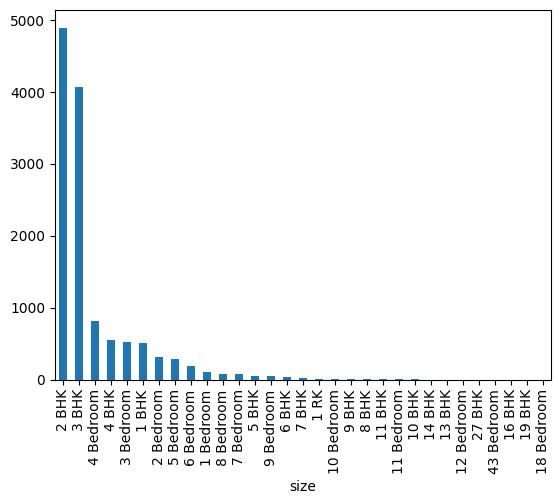

In [14]:
work_data['size'].value_counts().plot(kind='bar')



In [15]:
for i in range(len(work_data.iloc[:,3])):
  val=work_data.iloc[i,3].split(' ')
  work_data.iloc[i,3]=val[0]
work_data['size']=work_data['size'].astype(int)
work_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12631 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12631 non-null  object 
 1   availability    12631 non-null  object 
 2   location        12631 non-null  object 
 3   size            12631 non-null  int64  
 4   total_sqft      12631 non-null  float64
 5   bath            12631 non-null  float64
 6   balcony         12631 non-null  float64
 7   price           12631 non-null  float64
 8   price_per_sqft  12631 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 986.8+ KB


<Axes: xlabel='location'>

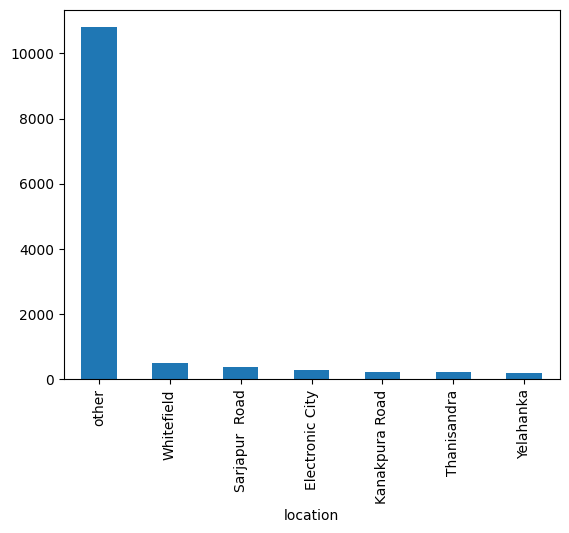

In [16]:
a=work_data['location'].value_counts()>200
work_data['location']=work_data['location'].apply(lambda x: 'other' if a[x]==False else x)
work_data['location'].value_counts().plot(kind='bar')

In [17]:
de=pd.get_dummies(work_data['location'])
de.replace({True:1,False:0},inplace=True)
work_data=pd.concat([work_data,de],axis=1)
work_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,Electronic City,Kanakpura Road,Sarjapur Road,Thanisandra,Whitefield,Yelahanka,other
0,Super built-up Area,19-Dec,other,2,1056.0,2.0,1.0,39.07,0.036998,0,0,0,0,0,0,1
1,Plot Area,Ready To Move,other,4,2600.0,5.0,3.0,120.00,0.046154,0,0,0,0,0,0,1
2,Built-up Area,Ready To Move,other,3,1440.0,2.0,3.0,62.00,0.043056,0,0,0,0,0,0,1
3,Super built-up Area,Ready To Move,other,3,1521.0,3.0,1.0,95.00,0.062459,0,0,0,0,0,0,1
4,Super built-up Area,Ready To Move,other,2,1200.0,2.0,1.0,51.00,0.042500,0,0,0,0,0,0,1


<Axes: xlabel='area_type'>

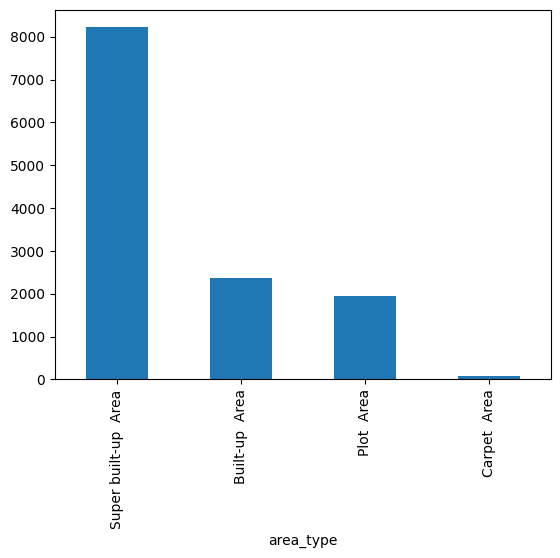

In [18]:
work_data.area_type.value_counts().plot(kind='bar')

In [19]:
work_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,Electronic City,Kanakpura Road,Sarjapur Road,Thanisandra,Whitefield,Yelahanka,other
0,Super built-up Area,19-Dec,other,2,1056.0,2.0,1.0,39.07,0.036998,0,0,0,0,0,0,1
1,Plot Area,Ready To Move,other,4,2600.0,5.0,3.0,120.00,0.046154,0,0,0,0,0,0,1
2,Built-up Area,Ready To Move,other,3,1440.0,2.0,3.0,62.00,0.043056,0,0,0,0,0,0,1
3,Super built-up Area,Ready To Move,other,3,1521.0,3.0,1.0,95.00,0.062459,0,0,0,0,0,0,1
4,Super built-up Area,Ready To Move,other,2,1200.0,2.0,1.0,51.00,0.042500,0,0,0,0,0,0,1


In [20]:
#work_data=work_data.iloc[:,3:-1]
#work_data.head()
b=work_data.area_type.value_counts()
b=pd.get_dummies(work_data['area_type'])
b.replace({True:1,False:0},inplace=True)
b.head()
work_data=pd.concat([work_data,b],axis=1)
work_data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,Electronic City,Kanakpura Road,Sarjapur Road,Thanisandra,Whitefield,Yelahanka,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,other,2,1056.0,2.0,1.0,39.07,0.036998,0,0,0,0,0,0,1,0,0,0,1
1,Plot Area,Ready To Move,other,4,2600.0,5.0,3.0,120.00,0.046154,0,0,0,0,0,0,1,0,0,1,0
2,Built-up Area,Ready To Move,other,3,1440.0,2.0,3.0,62.00,0.043056,0,0,0,0,0,0,1,1,0,0,0
3,Super built-up Area,Ready To Move,other,3,1521.0,3.0,1.0,95.00,0.062459,0,0,0,0,0,0,1,0,0,0,1
4,Super built-up Area,Ready To Move,other,2,1200.0,2.0,1.0,51.00,0.042500,0,0,0,0,0,0,1,0,0,0,1


In [21]:
work_data.drop(['area_type','location','availability'],axis=1,inplace=True)
work_data.head()

,size,total_sqft,bath,balcony,price,price_per_sqft,Electronic City,Kanakpura Road,Sarjapur Road,Thanisandra,Whitefield,Yelahanka,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2,1056.0,2.0,1.0,39.07,0.036998,0,0,0,0,0,0,1,0,0,0,1
1,4,2600.0,5.0,3.0,120.00,0.046154,0,0,0,0,0,0,1,0,0,1,0
2,3,1440.0,2.0,3.0,62.00,0.043056,0,0,0,0,0,0,1,1,0,0,0
3,3,1521.0,3.0,1.0,95.00,0.062459,0,0,0,0,0,0,1,0,0,0,1
4,2,1200.0,2.0,1.0,51.00,0.042500,0,0,0,0,0,0,1,0,0,0,1


In [22]:
# prompt: generate a code to remove outliers

# Calculate the IQR for each numerical feature
for column in work_data.select_dtypes(include=np.number):
  Q1 = work_data[column].quantile(0.25)
  Q3 = work_data[column].quantile(0.75)
  IQR = Q3 - Q1
  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Remove outliers
  work_data = work_data[(work_data[column] >= lower_bound) & (work_data[column] <= upper_bound)]

# Print the number of rows remaining after outlier removal
print(f"Number of rows remaining after outlier removal: {len(work_data)}")
work_data=work_data.reset_index(drop=True)

work_data.head()

Number of rows remaining after outlier removal: 5962


,size,total_sqft,bath,balcony,price,price_per_sqft,Electronic City,Kanakpura Road,Sarjapur Road,Thanisandra,Whitefield,Yelahanka,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2,1056.0,2.0,1.0,39.07,0.036998,0,0,0,0,0,0,1,0,0,0,1
1,3,1521.0,3.0,1.0,95.00,0.062459,0,0,0,0,0,0,1,0,0,0,1
2,2,1200.0,2.0,1.0,51.00,0.042500,0,0,0,0,0,0,1,0,0,0,1
3,3,1310.0,3.0,1.0,63.25,0.048282,0,0,0,0,0,0,1,0,0,0,1
4,2,1000.0,2.0,1.0,38.00,0.038000,0,0,0,0,0,0,1,0,0,0,1


In [23]:
work_data=work_data.drop(['other'],axis=1)
work_data.drop(work_data.columns[-1],axis=1)
work_data.head()

,size,total_sqft,bath,balcony,price,price_per_sqft,Electronic City,Kanakpura Road,Sarjapur Road,Thanisandra,Whitefield,Yelahanka,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2,1056.0,2.0,1.0,39.07,0.036998,0,0,0,0,0,0,0,0,0,1
1,3,1521.0,3.0,1.0,95.00,0.062459,0,0,0,0,0,0,0,0,0,1
2,2,1200.0,2.0,1.0,51.00,0.042500,0,0,0,0,0,0,0,0,0,1
3,3,1310.0,3.0,1.0,63.25,0.048282,0,0,0,0,0,0,0,0,0,1
4,2,1000.0,2.0,1.0,38.00,0.038000,0,0,0,0,0,0,0,0,0,1


0.9992876203329109
0.3940038600167619
0.8156055355912879


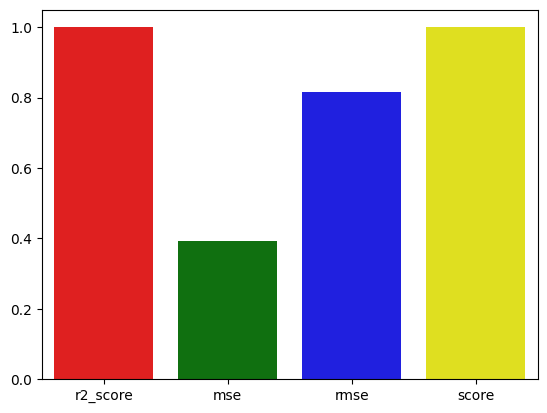

In [24]:
x=work_data.drop(['price'],axis=1)
y=work_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model=RandomForestRegressor(max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
model.score(x_train,y_train)
sns.barplot([r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),model.score(x_train,y_train)],palette=['red', 'green', 'blue', 'yellow'])
plt.xticks([0,1,2,3],['r2_score','mse','rmse','score'])
plt.show()

In [25]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9988383025557959
0.6105351119189331
1.041527938152675
